In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
df16 = pd.read_csv(os.path.join('2016_Data'))
del df16['Unnamed: 0']
del df16['Year']
del df16['Month']
del df16['Day']
del df16['Day_of_Week']
del df16['Weekend']
del df16['Datetime']

df16.head()

,MW,Utility,Temp(f)
0,10419.0,COMED,32.0
1,9940.0,COMED,32.0
2,9604.0,COMED,35.6
3,9318.0,COMED,37.4
4,9224.0,COMED,37.4


In [13]:
droplist = df16[(df16['Temp(f)']> 60) & (df16['Temp(f)']<70)& (df16.MW > 16000) ].index

In [14]:
df16.drop(droplist,inplace = True)

In [46]:
df_2016 = df16.reset_index(drop=True)

In [47]:
df_2016c = df_2016[df_2016.Utility == 'COMED'].copy()

In [48]:
df_2016pos = df_2016c[df_2016c['Temp(f)'] >= 60].copy()
df_2016neg = df_2016c[df_2016c['Temp(f)'] < 60].copy()

In [49]:
df_2016d = df_2016[df_2016.Utility == 'DAYTON'].copy()

In [50]:
X = df_2016pos["Temp(f)"].values.reshape(-1, 1)
y = df_2016pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (3949, 1) (3949, 1)


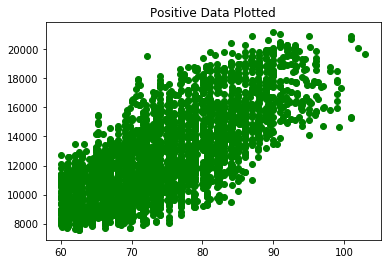

In [51]:
plt.scatter(X, y,color='g')
plt.title("Positive Data Plotted")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.51483629205736
Testing Score: 0.5594125647638623


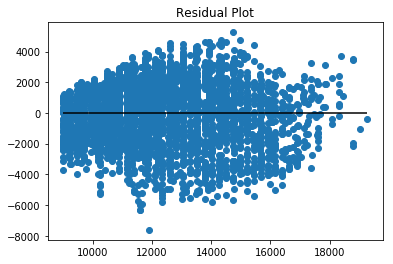

In [54]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

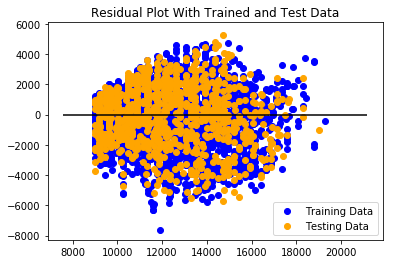

In [55]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [56]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[239.23712514]]
y-axis intercept:  [-5366.93865258]


In [57]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -5366.93865258+ 239.23712514 * x_min
y_max = -5366.93865258+ 239.23712514 * x_max

Actual Min Value: 7568.0
Predicted Min Value: [[8989.68122687]]
Actual Max Value: 21175.0
Predicted Max Value: [[19272.09286524]]


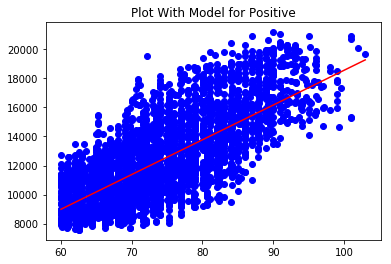

In [58]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for Positive")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [59]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [9036.]
Predicted output: [10470.55903146]
Prediction Error: [1434.55903146]


In [63]:
pd.DataFrame([{"Predicted": predictions, "Actual": y, "Error": predictions - y}])[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,"[[10470.559031463186], [10470.559031463186], [...","[[9036.0], [8550.0], [8242.0], [8059.0], [7980...","[[1434.5590314631863], [1920.5590314631863], [..."
